In [24]:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [36]:
import os

In [37]:
files=os.listdir(r'/content/gdrive/MyDrive/Datasets/')

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px


path=r'/content/gdrive/MyDrive/Datasets/'
final=pd.DataFrame()
for file in files:
    df=pd.read_csv(path+"/"+file,encoding='cp1252')
    final=pd.concat([df,final])

In [39]:
final.head()

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


In [40]:

final.shape

(4534327, 4)

In [41]:
df=final.copy()

In [42]:
df.shape

(4534327, 4)

In [43]:
df['Date/Time']=pd.to_datetime(df['Date/Time'])

In [44]:
df.dtypes

Date/Time    datetime64[ns]
Lat                 float64
Lon                 float64
Base                 object
dtype: object

In [45]:
df['week-day']=df['Date/Time'].dt.day_name()
df['month']=df['Date/Time'].dt.month
df['hour']=df['Date/Time'].dt.hour
df['day']=df['Date/Time'].dt.day

In [46]:
df.head()

,Date/Time,Lat,Lon,Base,week-day,month,hour,day
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,Monday,9,0,1
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,Monday,9,0,1
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,Monday,9,0,1
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,Monday,9,0,1
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,Monday,9,0,1


<BarContainer object of 7 artists>

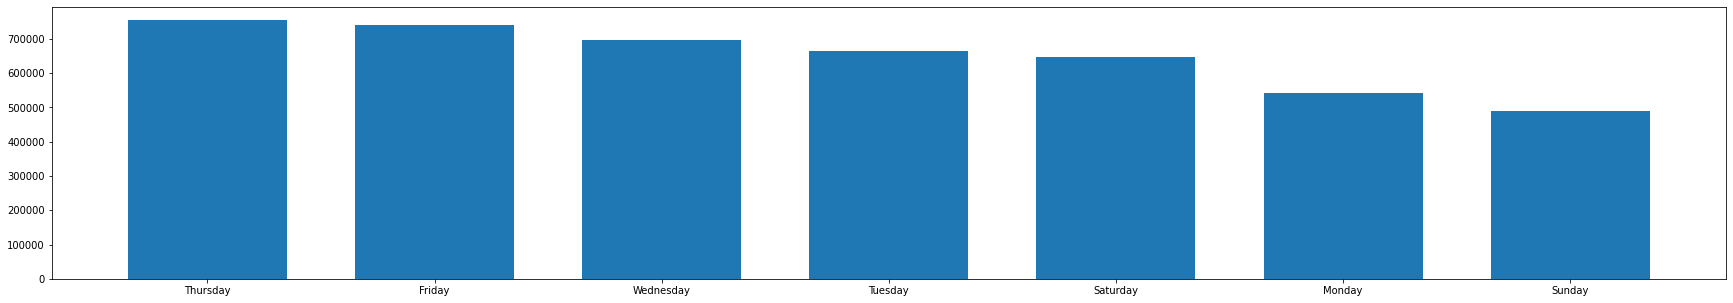

In [47]:
plt.figure(figsize=(30,5))
plt.bar(df['week-day'].value_counts().index,df['week-day'].value_counts(),width=0.7 )

In [48]:
for i,month in enumerate(df['month'].unique()):
  print(str(i) +" Month is "+str(month))


0 Month is 9
1 Month is 5
2 Month is 6
3 Month is 7
4 Month is 4
5 Month is 8


In [49]:
print(df['hour'].unique())
df['month'].unique()

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


array([9, 5, 6, 7, 4, 8])

In [50]:
df[ df['month']==9]['hour'].value_counts()

18    75040
17    73373
19    69660
16    68224
20    63988
15    61219
21    60606
14    52643
22    51817
13    45042
8     44477
7     43314
12    39193
11    38821
9     38542
10    37634
23    36568
6     33307
0     24133
5     20262
1     16107
4     12675
3     10789
2     10702
Name: hour, dtype: int64

**ANALYSING THE TRIPS OF UBER**

Here is the bar graph illustration of the rides in uber which shows the more traffic  from 15:00 to 24:00

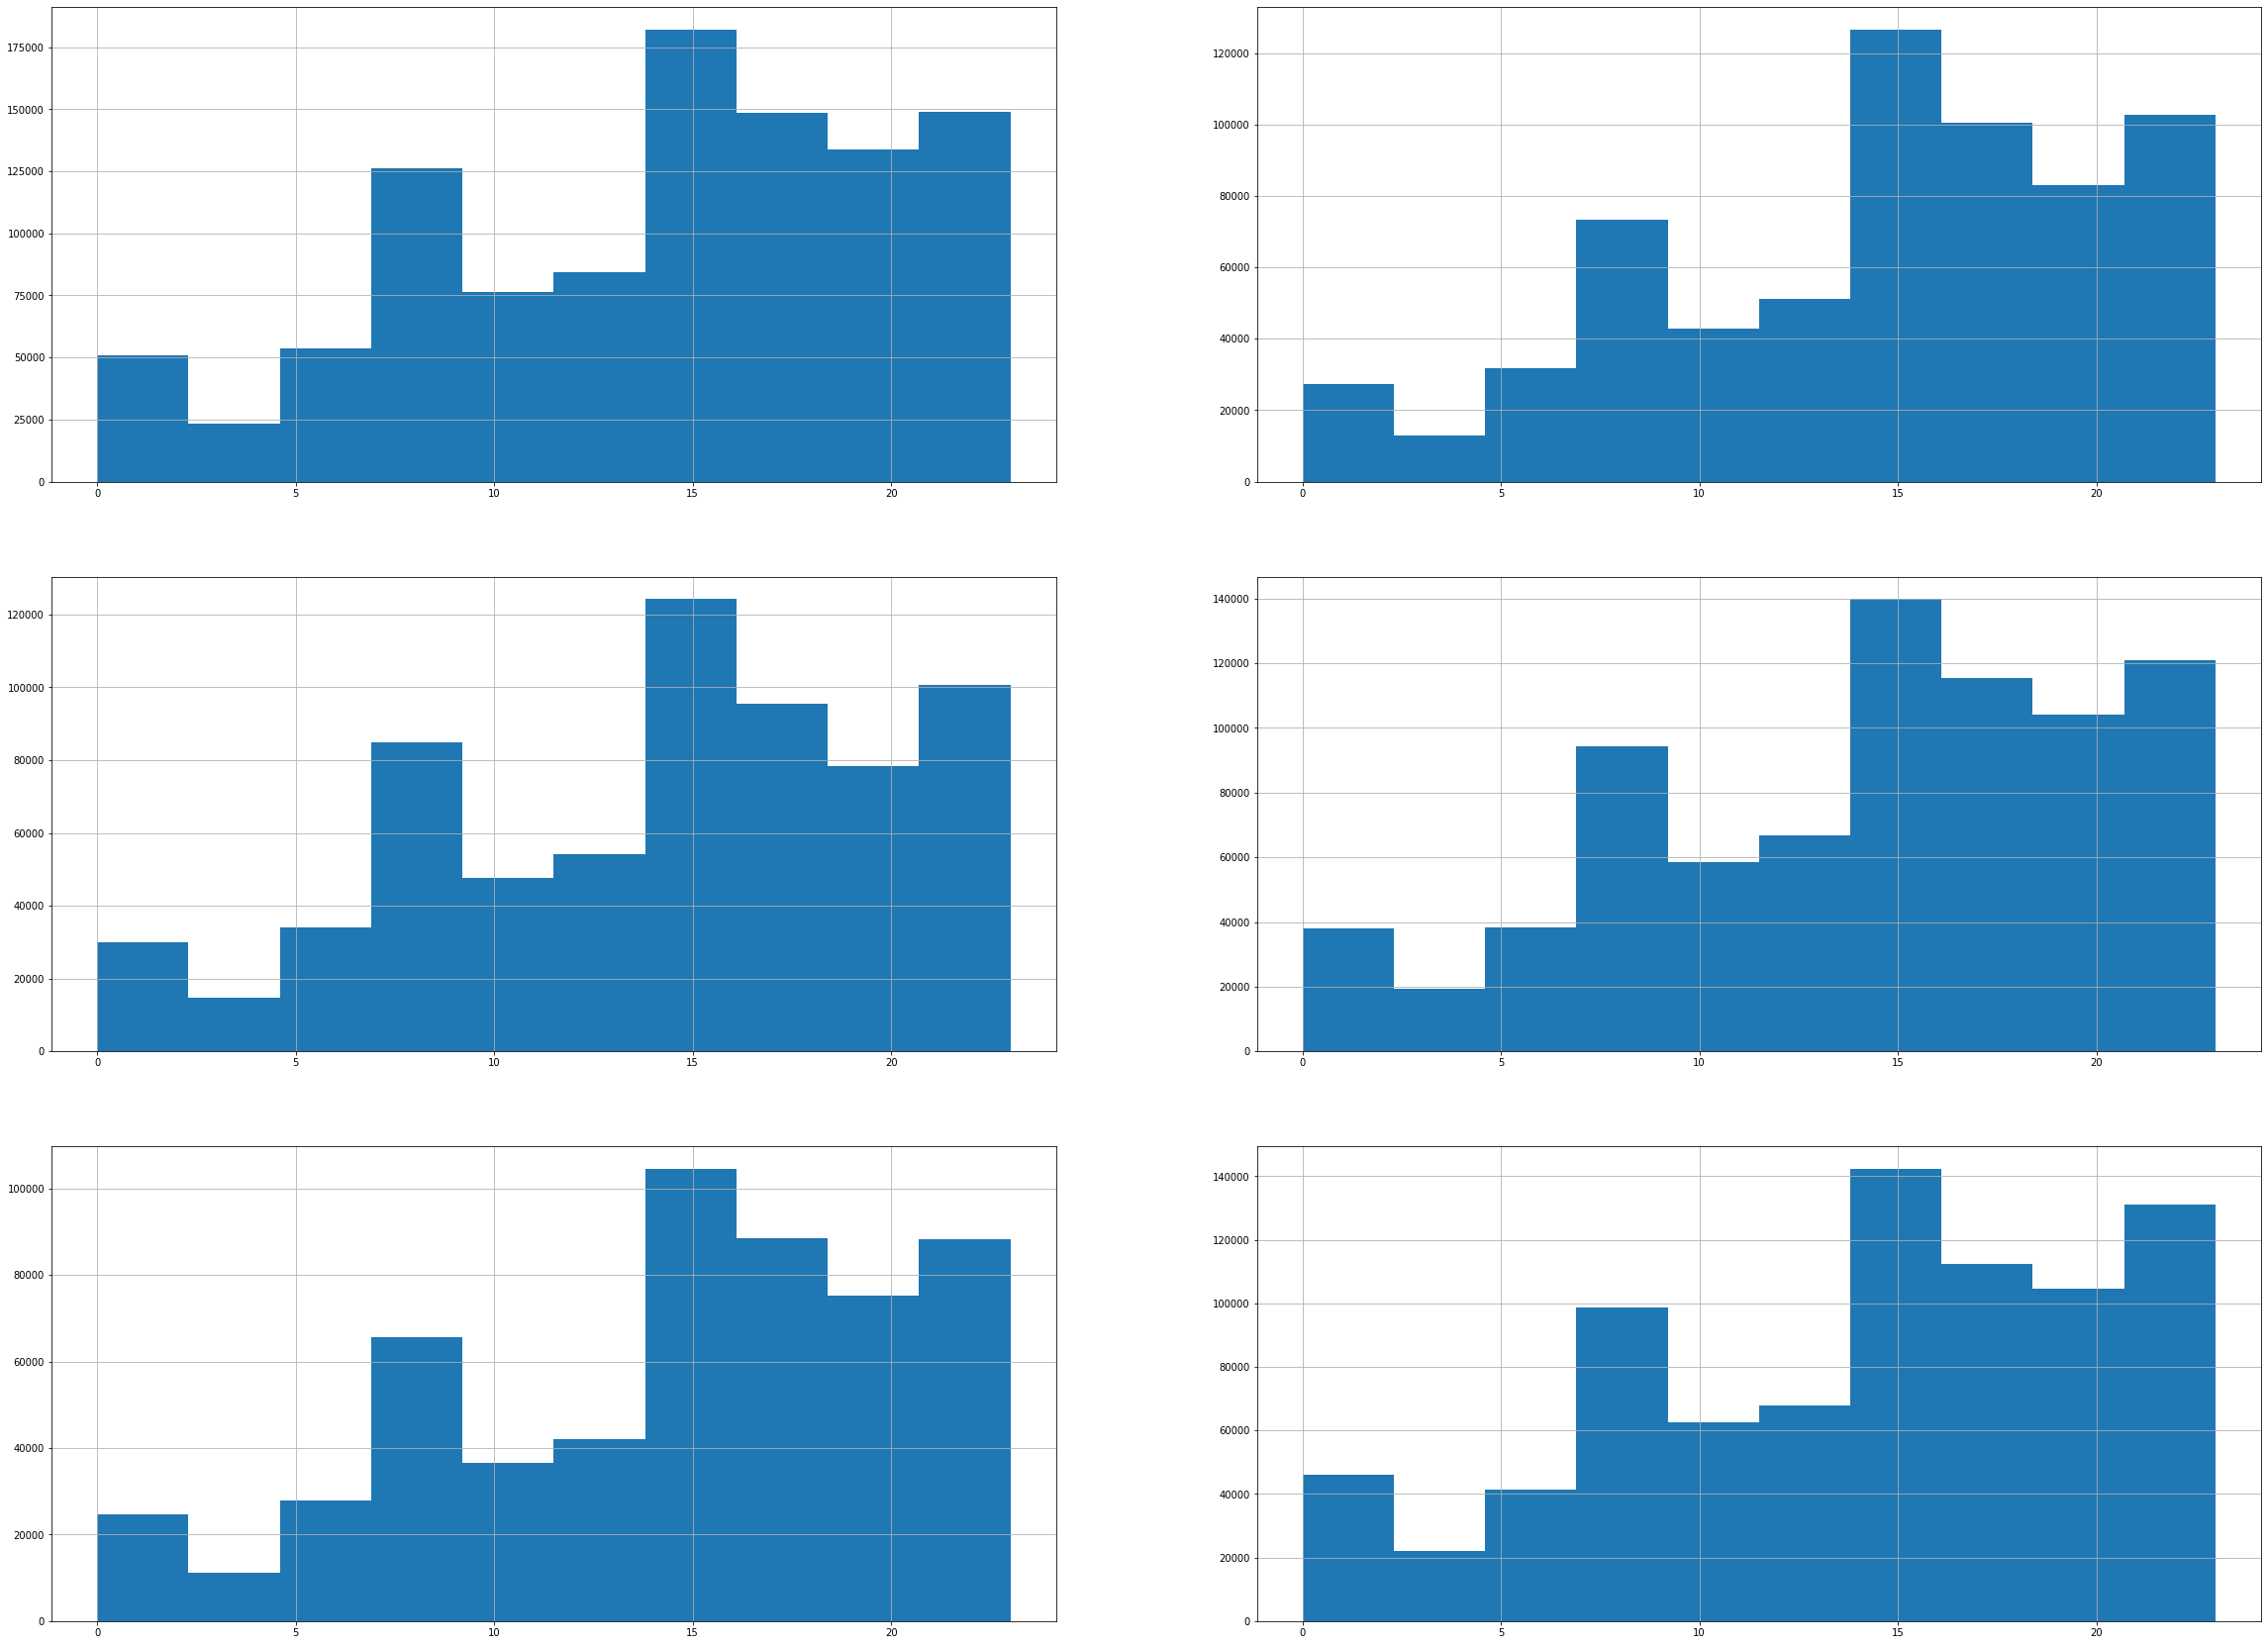

In [79]:
plt.figure(figsize=(40,30))
for i,month in enumerate(df['month'].unique()):
  plt.subplot(3,2,i+1)
  df[df['month']==month]['hour'].hist()



In [80]:
final.head()

,Date/Time,Lat,Lon,Base
0,9/1/2014 0:01:00,40.2201,-74.0021,B02512
1,9/1/2014 0:01:00,40.7500,-74.0027,B02512
2,9/1/2014 0:03:00,40.7559,-73.9864,B02512
3,9/1/2014 0:06:00,40.7450,-73.9889,B02512
4,9/1/2014 0:11:00,40.8145,-73.9444,B02512


## **Analysing monthly rides** 

In [81]:
pip install chart_studio 

In [82]:
# import chart_stdio.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot

In [83]:
type(df.groupby('month')['hour'].count() )

pandas.core.series.Series

In [84]:
trace1=go.Bar(x=df.groupby('month')['hour'].count().index,
       y=df.groupby('month')['hour'].count(),
       name='Priority'
       )
iplot([trace1])

In [85]:
df['day'].sort_values().value_counts()

30    167160
12    160606
16    158921
13    156892
23    156032
9     155135
15    153726
26    153405
19    153088
25    152667
17    152524
10    152500
18    151319
29    149086
11    148860
5     147054
22    146952
8     145984
27    145652
20    144179
24    144169
7     143503
2     143201
3     142983
28    141157
21    141112
4     140923
14    140148
6     139886
1     127430
31     78073
Name: day, dtype: int64

Text(0.5, 1.0, 'Journeys by months day')

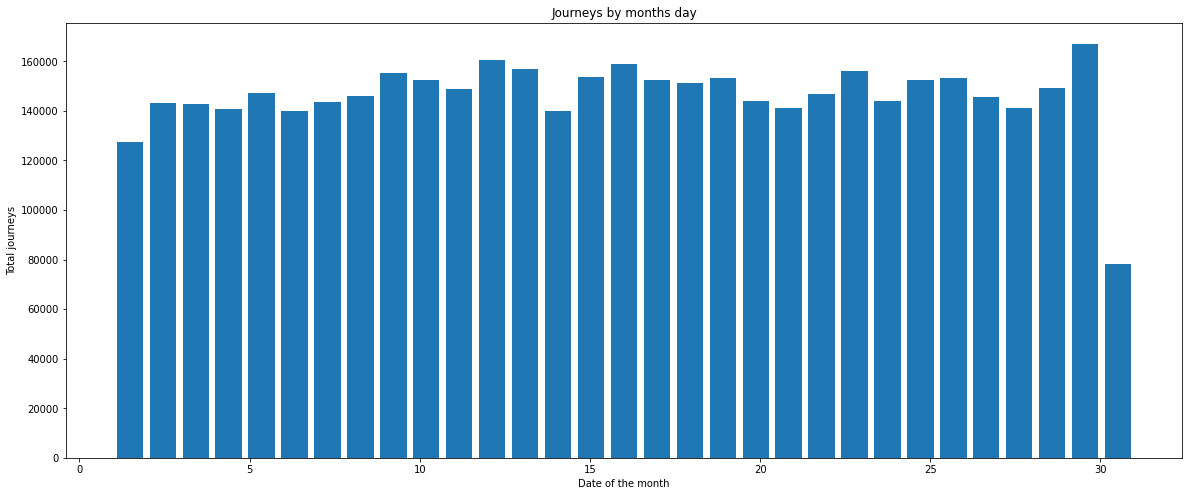

In [86]:
plt.figure(figsize=(20,8))
plt.hist(df['day'],bins=31,rwidth=0.8,range=(1,31))
plt.xlabel("Date of the month")
plt.ylabel("Total journeys")
plt.title("Journeys by months day")

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



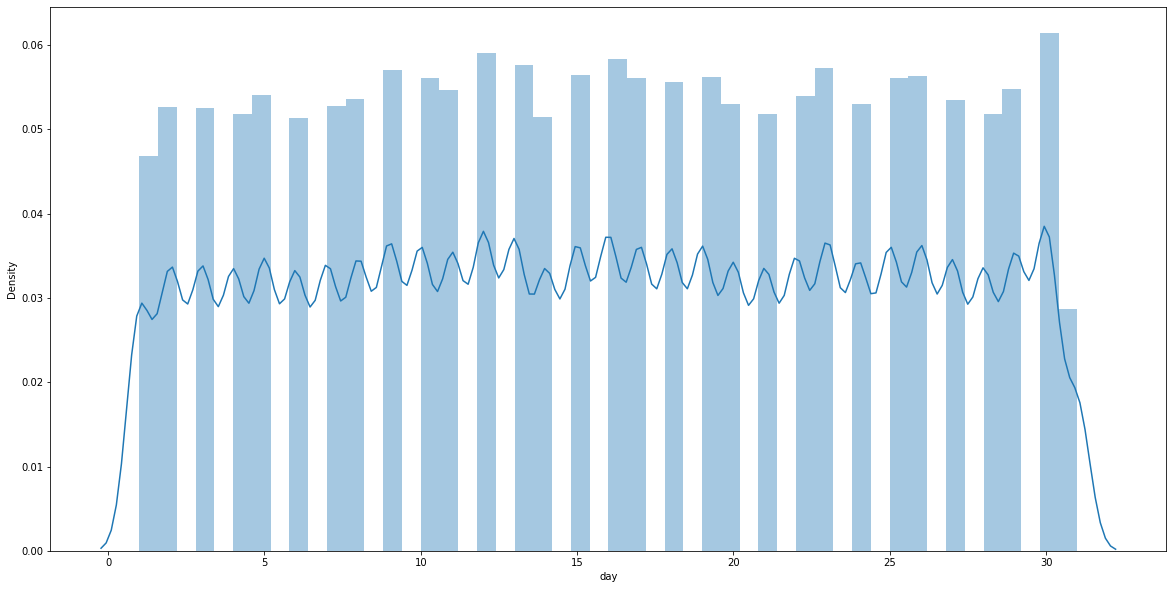

In [205]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.distplot(df['day'])

### **Analising Demand of Users**

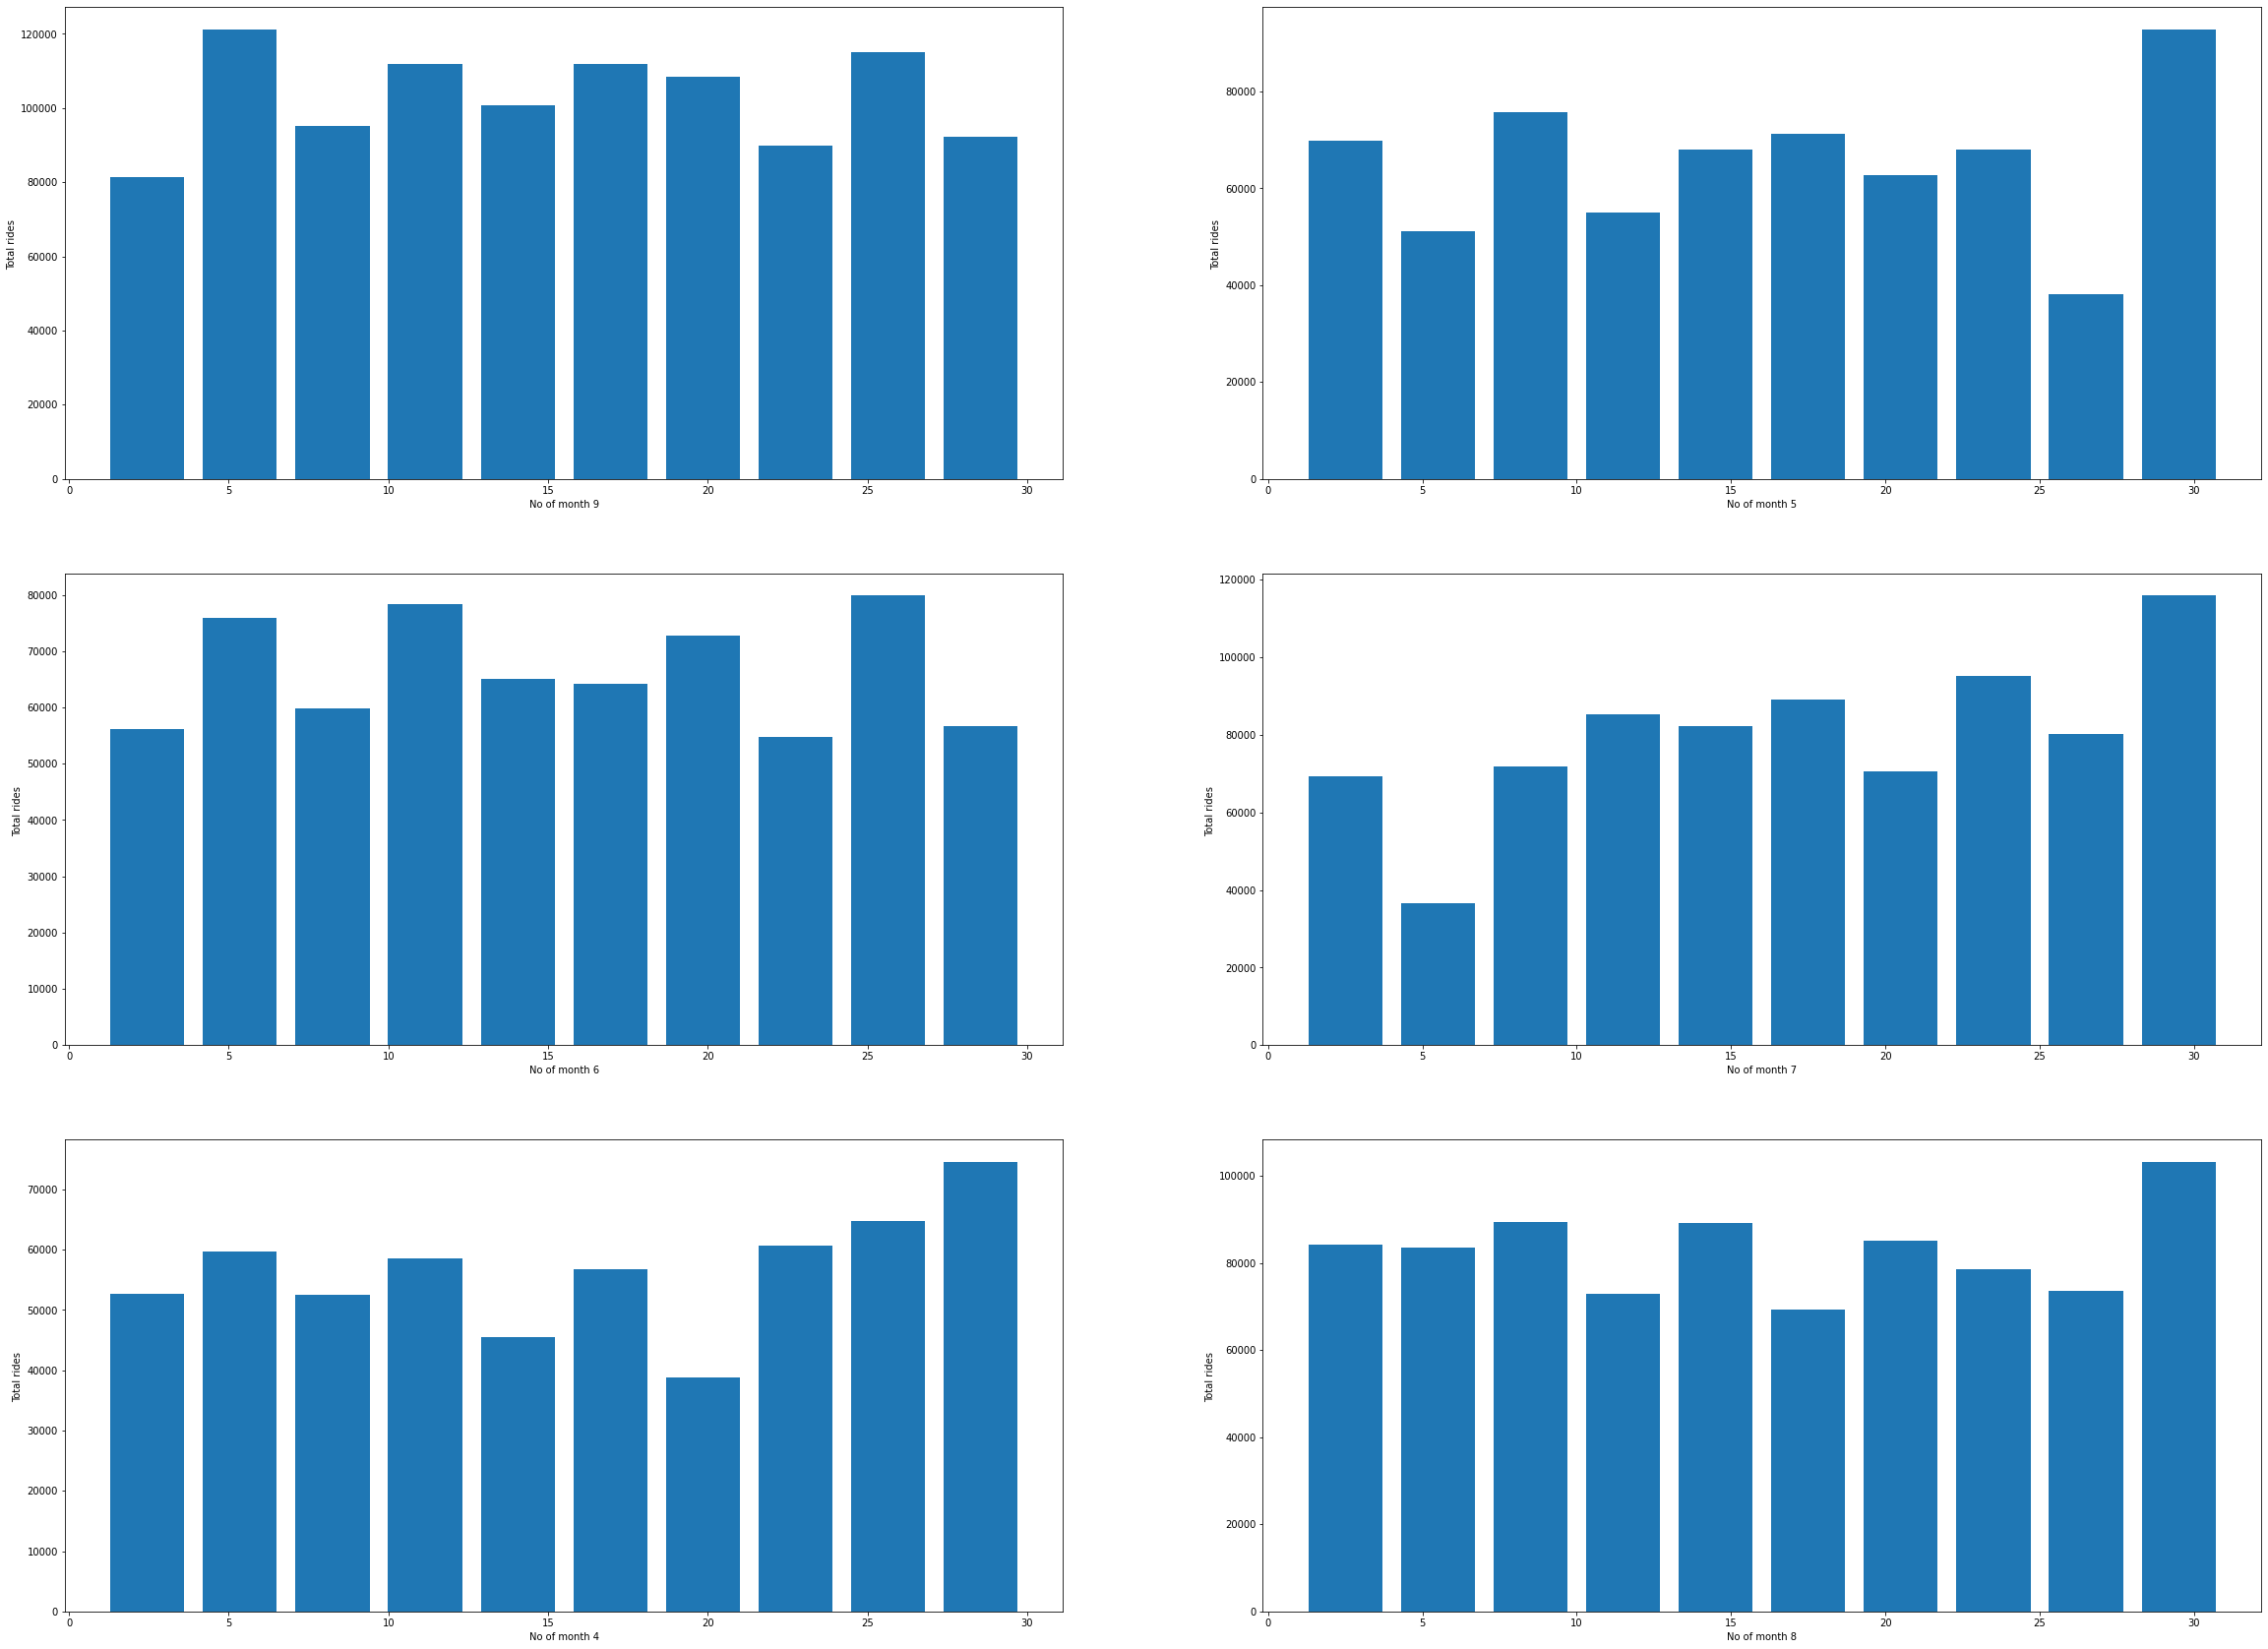

In [88]:
plt.figure(figsize=(40,30))
for i,month in enumerate(df['month'].unique(),1):
  plt.subplot(3,2,i)
  plt.hist(df[df['month']==month] ['day'],rwidth=0.8 )
  plt.xlabel("No of month {}".format(month))
  plt.ylabel("Total rides ")


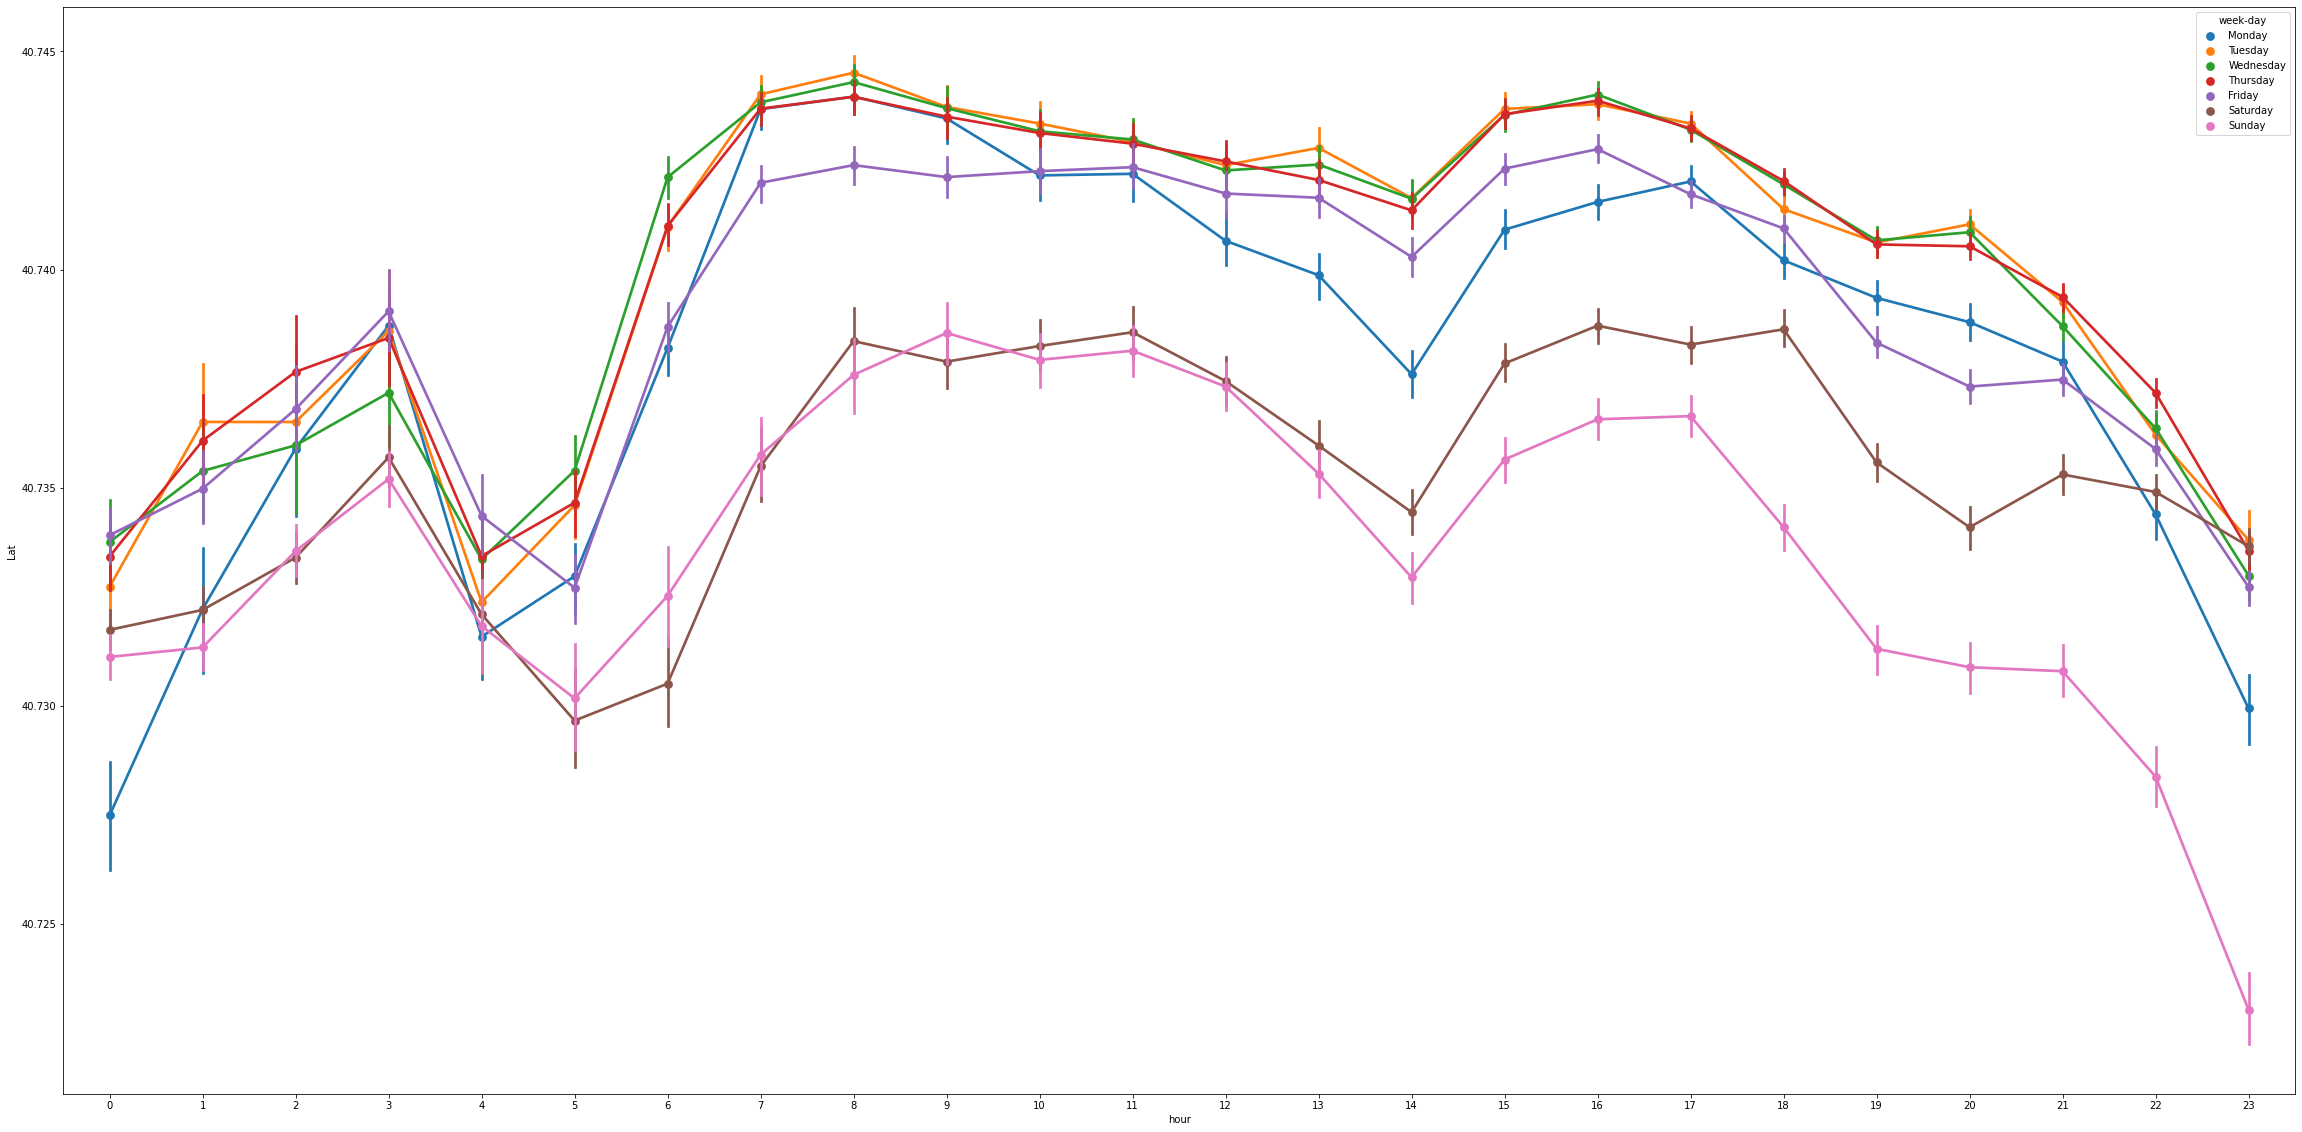

In [90]:
plt.figure(figsize=(40,20))
sns.pointplot(x=df["hour"],y=df["Lat"],hue=df["week-day"])

In [91]:
base=df.groupby(['Base','month'])['Date/Time'].count().reset_index()

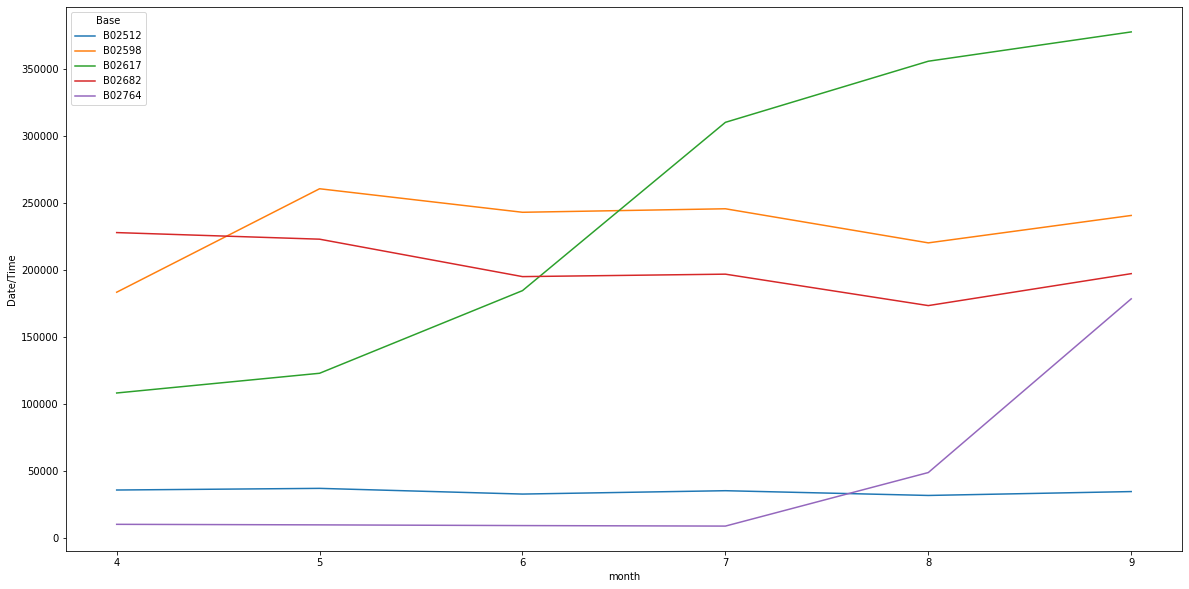

In [92]:
plt.figure(figsize=(20,10))
sns.lineplot(x='month',y='Date/Time',hue='Base',data=base)

In [93]:
def count_rows(rows):
  return len(rows)
by_cross=df.groupby(['week-day','hour' ]).apply(count_rows)

In [94]:
pivot=by_cross.unstack()
pivot

hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
week-day,,,,,,,,,,,,,,,,,,,,,,,,
Friday,13716,8163,5350,6930,8806,13450,23412,32061,31509,25230,24176,25188,25907,30341,36206,43673,48169,51961,54762,49595,43542,48323,49409,41260
Monday,6436,3737,2938,6232,9640,15032,23746,31159,29265,22197,20288,20333,20488,23385,28157,32744,38770,42023,37000,34159,32849,28925,20158,11811
Saturday,27633,19189,12710,9542,6846,7084,8579,11014,14411,17669,20596,22718,24298,26636,31418,38769,43512,42844,45883,41098,38714,43826,47951,43174
Sunday,32877,23015,15436,10597,6374,6169,6596,8728,12128,16401,19839,22856,23911,26417,28151,31112,33038,31521,28291,25948,25076,23967,19566,12166
Thursday,9293,5290,3719,5637,8505,14169,27065,37038,35431,27812,25877,25966,26465,30840,36699,44442,50560,56704,55825,51907,51990,51953,44194,27764
Tuesday,6237,3509,2571,4494,7548,14241,26872,36599,33934,25023,23676,23679,23850,29075,34846,41338,48667,55500,50186,44789,44661,39913,27712,14869
Wednesday,7644,4324,3141,4855,7511,13794,26943,36495,33826,25635,24696,24963,25533,29183,35148,43388,50684,55637,52732,47017,47772,44553,32868,18146


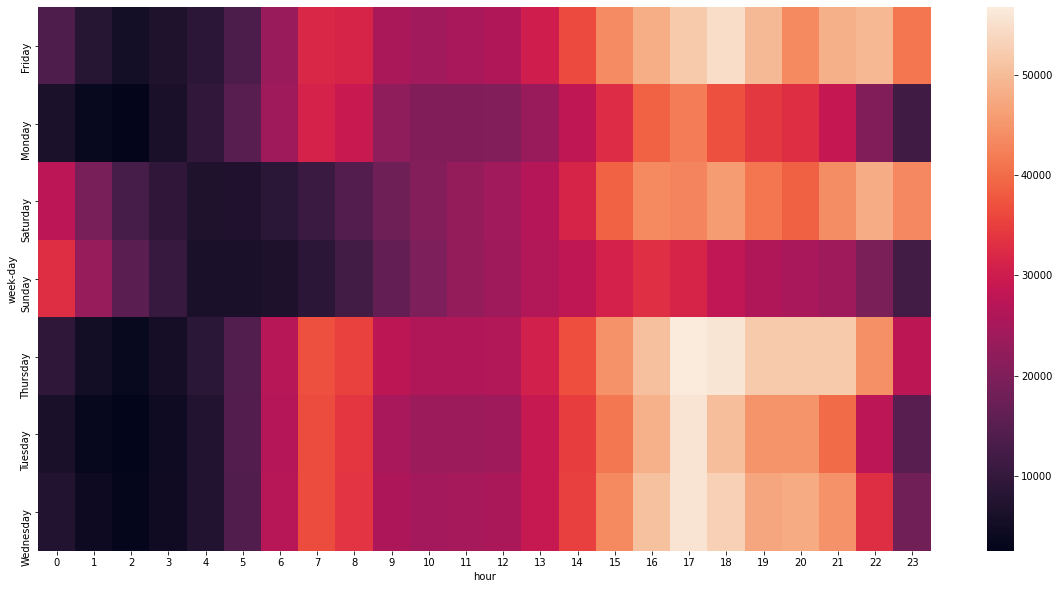

In [95]:
plt.figure(figsize=(20,10))
sns.heatmap(pivot)

## The heatmap above basically shows that in  evening hours traffic is more as compare to the morning hours

In [96]:
def heatmap(col1,col2):
  by_cross=df.groupby([col1,col2 ]).apply(count_rows)
  pivot=by_cross.unstack()
  plt.figure(figsize=(20,10))
  sns.heatmap(pivot)

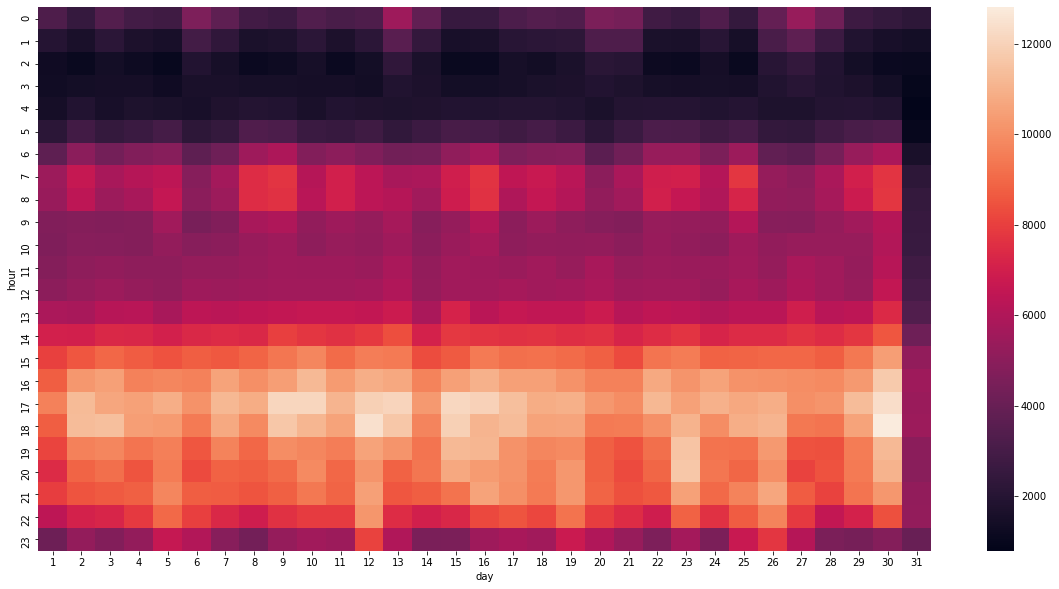

In [97]:
heatmap('hour','day')

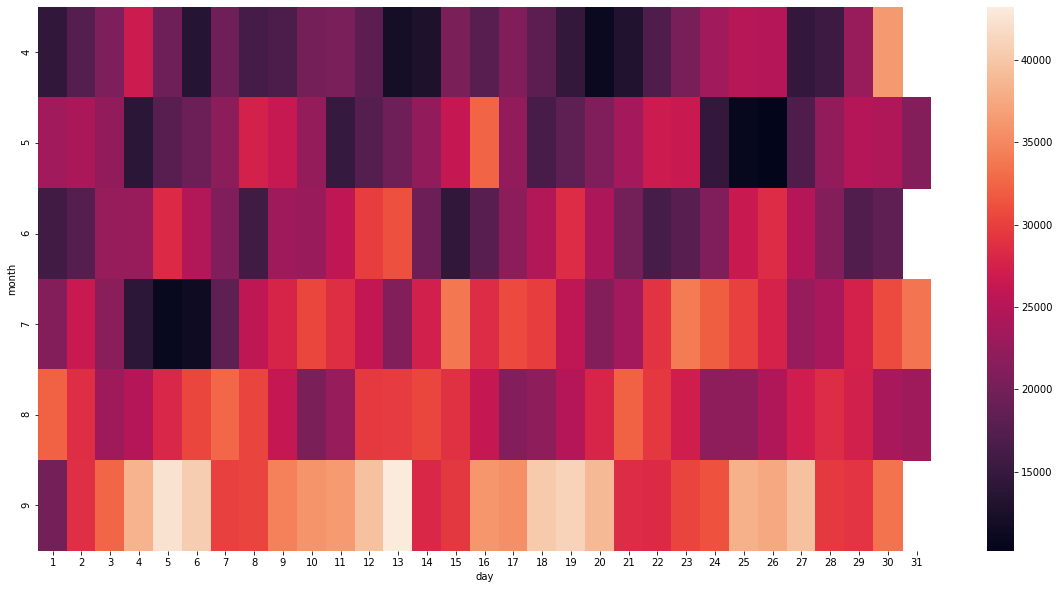

In [98]:
heatmap(df['month'],df['day'])

## This one shows that during the evening hours on 8th month(August) and 5th month(April) total rides was bit less when compared with the other months.

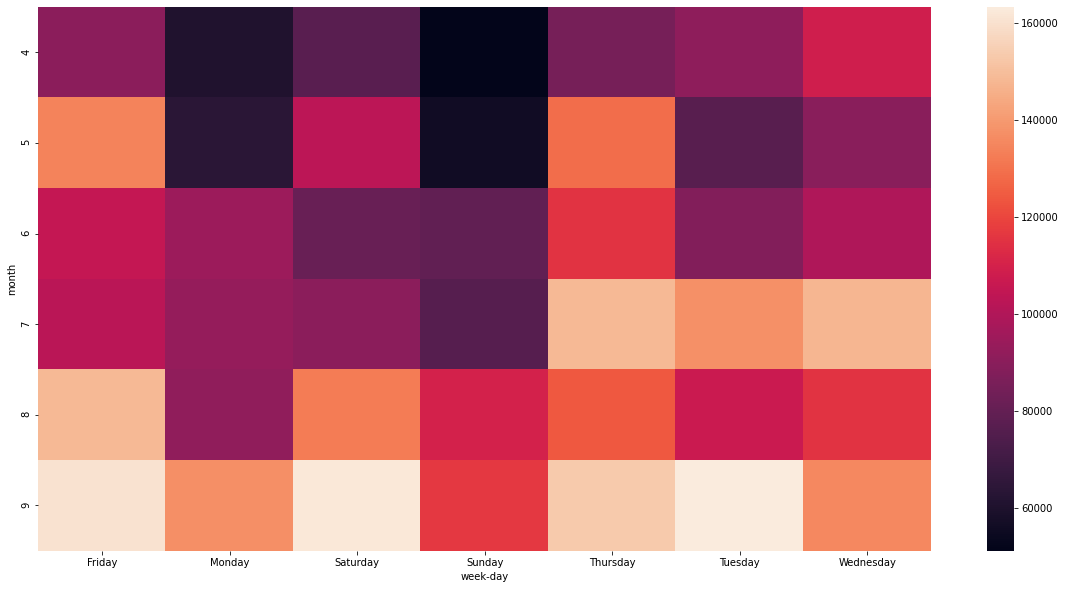

In [99]:
heatmap(df['month'],df['week-day'])

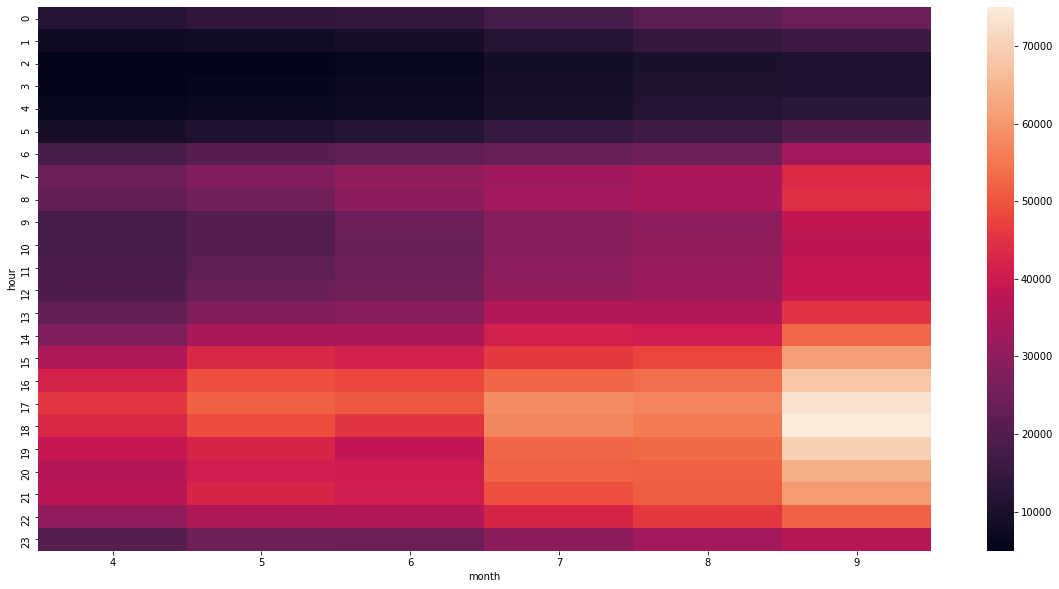

In [100]:
heatmap(df['hour'],df['month'])

In [101]:
df.head()

,Date/Time,Lat,Lon,Base,week-day,month,hour,day,minute
0,2014-09-01 00:01:00,40.2201,-74.0021,B02512,Monday,9,0,1,1
1,2014-09-01 00:01:00,40.7500,-74.0027,B02512,Monday,9,0,1,1
2,2014-09-01 00:03:00,40.7559,-73.9864,B02512,Monday,9,0,1,3
3,2014-09-01 00:06:00,40.7450,-73.9889,B02512,Monday,9,0,1,6
4,2014-09-01 00:11:00,40.8145,-73.9444,B02512,Monday,9,0,1,11


(40.5, 41.8)

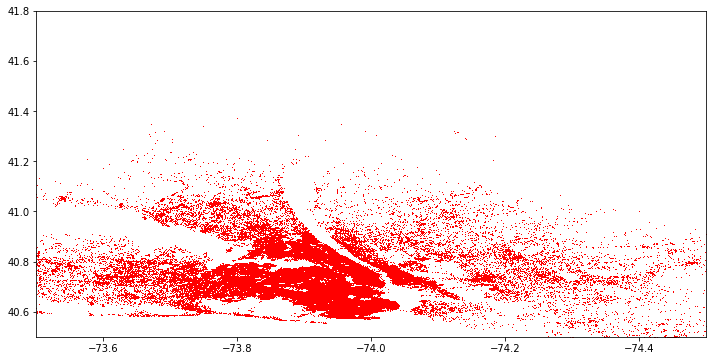

In [102]:
plt.figure(figsize=(12,6))
plt.plot(df['Lon'],df['Lat'],'r+',ms=0.5)
plt.xlim(-73.5,-74.5)
plt.ylim(40.5,41.8)


In [103]:
# df_out.shape

In [104]:
df['minute']=df['Date/Time'].dt.minute
df_out= df[ df['week-day']=='Sunday' ]

In [105]:
df_out.head()

,Date/Time,Lat,Lon,Base,week-day,month,hour,day,minute
8011,2014-09-07 00:00:00,40.7341,-74.0005,B02512,Sunday,9,0,7,0
8012,2014-09-07 00:00:00,40.7344,-73.9900,B02512,Sunday,9,0,7,0
8013,2014-09-07 00:00:00,40.7806,-73.9582,B02512,Sunday,9,0,7,0
8014,2014-09-07 00:01:00,40.7293,-73.9859,B02512,Sunday,9,0,7,1
8015,2014-09-07 00:01:00,40.7713,-74.0133,B02512,Sunday,9,0,7,1


In [106]:
rush=df_out.groupby(['Lat','Lon'])['week-day'].count().reset_index()
rush.columns=["Latitude","Longitude","Number of trips"]
rush

,Latitude,Longitude,Number of trips
0,39.9374,-74.0722,1
1,39.9378,-74.0721,1
2,39.9384,-74.0742,1
3,39.9385,-74.0734,1
4,39.9415,-74.0736,1
...,...,...,...
209225,41.3141,-74.1249,1
209226,41.3180,-74.1298,1
209227,41.3195,-73.6905,1
209228,41.3197,-73.6903,1


In [107]:
!pip install folium

In [108]:
rush

,Latitude,Longitude,Number of trips
0,39.9374,-74.0722,1
1,39.9378,-74.0721,1
2,39.9384,-74.0742,1
3,39.9385,-74.0734,1
4,39.9415,-74.0736,1
...,...,...,...
209225,41.3141,-74.1249,1
209226,41.3180,-74.1298,1
209227,41.3195,-73.6905,1
209228,41.3197,-73.6903,1


In [116]:
ls=[]
for i in range(1,1000):
  on=rush['Latitude'][i]
  tw=rush['Longitude'][i]
  ls.append([on,tw])

In [121]:
import folium
from branca.element import Figure
fig5=Figure(height=700,width=1000)
m5=folium.Map(tiles='Stamen Terrain')
fig5.add_child(m5)

In [122]:
# Creating feature groups
f1=folium.FeatureGroup("Uber trips")

line_1=folium.vector_layers.PolyLine(ls,popup='<b>Path of Vehicle_1</b>',tooltip='Uber Trips',color='blue',weight=10).add_to(f1)
f1.add_to(m5)
m5

### Visuals of the routes of uber




In [127]:
df2=pd.read_csv('/content/gdrive/MyDrive/Datasets/uber-raw-data-janjune-15.csv')

In [128]:
df2.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-17 09:47:00,B02617,141.0
1,B02617,2015-05-17 09:47:00,B02617,65.0
2,B02617,2015-05-17 09:47:00,B02617,100.0
3,B02617,2015-05-17 09:47:00,B02774,80.0
4,B02617,2015-05-17 09:47:00,B02617,90.0


In [132]:
df2.shape

(406915, 4)

In [138]:
uber_15=df2
uber_15.dtypes

Dispatching_base_num     object
Pickup_date              object
Affiliated_base_num      object
locationID              float64
dtype: object

In [140]:
uber_15['Pickup_date']=pd.to_datetime(uber_15['Pickup_date'],errors='coerce')

In [141]:
uber_15.dtypes

Dispatching_base_num            object
Pickup_date             datetime64[ns]
Affiliated_base_num             object
locationID                     float64
dtype: object

In [145]:

uber_15['weekday']=uber_15['Pickup_date'].dt.day_name()
uber_15['month']=uber_15['Pickup_date'].dt.month
uber_15['day']=uber_15['Pickup_date'].dt.day
uber_15['hour']=uber_15['Pickup_date'].dt.year


In [150]:
uber_15.drop(['minute'],axis=1)

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,year,weekday,month,day,hour
0,B02617,2015-05-17 09:47:00,B02617,141.0,2015.0,Sunday,5.0,17.0,2015.0
1,B02617,2015-05-17 09:47:00,B02617,65.0,2015.0,Sunday,5.0,17.0,2015.0
2,B02617,2015-05-17 09:47:00,B02617,100.0,2015.0,Sunday,5.0,17.0,2015.0
3,B02617,2015-05-17 09:47:00,B02774,80.0,2015.0,Sunday,5.0,17.0,2015.0
4,B02617,2015-05-17 09:47:00,B02617,90.0,2015.0,Sunday,5.0,17.0,2015.0
...,...,...,...,...,...,...,...,...,...
406910,B02764,2015-01-06 20:09:50,B02764,107.0,2015.0,Tuesday,1.0,6.0,2015.0
406911,B02764,2015-01-06 19:14:25,B02764,145.0,2015.0,Tuesday,1.0,6.0,2015.0
406912,B02764,2015-01-06 11:58:36,B02764,173.0,2015.0,Tuesday,1.0,6.0,2015.0
406913,B02764,2015-01-06 11:43:43,B02764,236.0,2015.0,Tuesday,1.0,6.0,2015.0


In [152]:
uber_15

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,year,weekday,month,day,hour,minute
0,B02617,2015-05-17 09:47:00,B02617,141.0,2015.0,Sunday,5.0,17.0,2015.0,2015.0
1,B02617,2015-05-17 09:47:00,B02617,65.0,2015.0,Sunday,5.0,17.0,2015.0,2015.0
2,B02617,2015-05-17 09:47:00,B02617,100.0,2015.0,Sunday,5.0,17.0,2015.0,2015.0
3,B02617,2015-05-17 09:47:00,B02774,80.0,2015.0,Sunday,5.0,17.0,2015.0,2015.0
4,B02617,2015-05-17 09:47:00,B02617,90.0,2015.0,Sunday,5.0,17.0,2015.0,2015.0
...,...,...,...,...,...,...,...,...,...,...
406910,B02764,2015-01-06 20:09:50,B02764,107.0,2015.0,Tuesday,1.0,6.0,2015.0,2015.0
406911,B02764,2015-01-06 19:14:25,B02764,145.0,2015.0,Tuesday,1.0,6.0,2015.0,2015.0
406912,B02764,2015-01-06 11:58:36,B02764,173.0,2015.0,Tuesday,1.0,6.0,2015.0,2015.0
406913,B02764,2015-01-06 11:43:43,B02764,236.0,2015.0,Tuesday,1.0,6.0,2015.0,2015.0


In [153]:
uber_15['minute']=uber_15['Pickup_date'].dt.minute
uber_15.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,year,weekday,month,day,hour,minute
0,B02617,2015-05-17 09:47:00,B02617,141.0,2015.0,Sunday,5.0,17.0,2015.0,47.0
1,B02617,2015-05-17 09:47:00,B02617,65.0,2015.0,Sunday,5.0,17.0,2015.0,47.0
2,B02617,2015-05-17 09:47:00,B02617,100.0,2015.0,Sunday,5.0,17.0,2015.0,47.0
3,B02617,2015-05-17 09:47:00,B02774,80.0,2015.0,Sunday,5.0,17.0,2015.0,47.0
4,B02617,2015-05-17 09:47:00,B02617,90.0,2015.0,Sunday,5.0,17.0,2015.0,47.0


In [155]:
uber_15['month'].value_counts()

1.0    85199
5.0    80835
6.0    80222
3.0    74482
4.0    48750
2.0    37426
Name: month, dtype: int64

<BarContainer object of 6 artists>

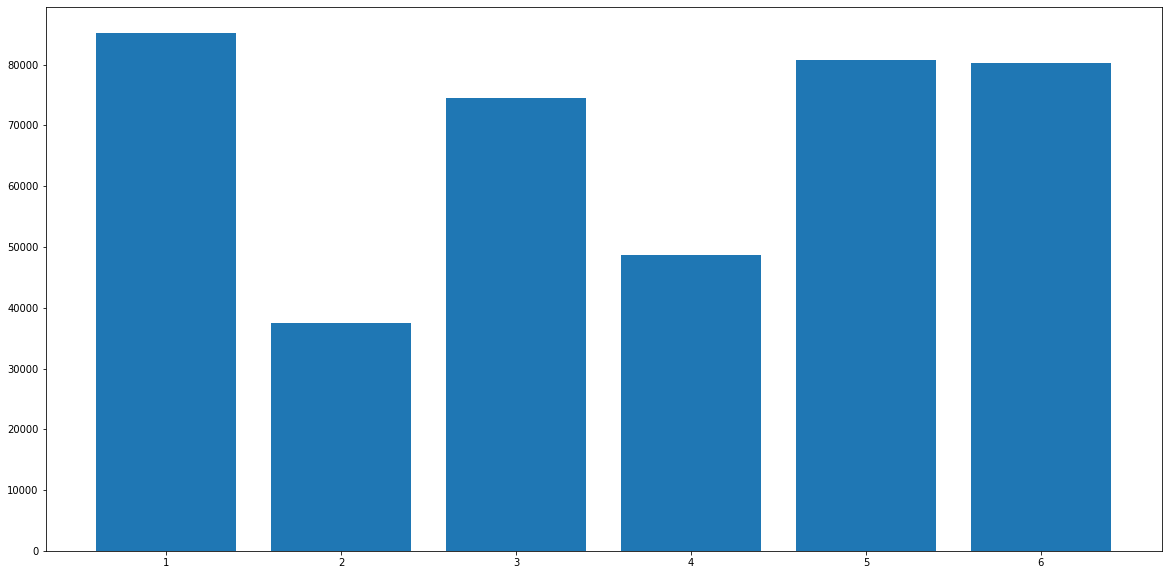

In [157]:
plt.figure(figsize=(20,10))
plt.bar(uber_15['month'].value_counts().index,uber_15['month'].value_counts())

### The bar graph above basically shows us pickups are low in months 2 and 4 which is different from other 4 months

In [162]:
uber_15['month'].value_counts().reset_index()

,index,month
0,1.0,85199
1,5.0,80835
2,6.0,80222
3,3.0,74482
4,4.0,48750
5,2.0,37426


In [164]:
px.bar(x=uber_15['month'].value_counts().index,y=uber_15['month'].value_counts())

In [172]:
uber_15=uber_15.drop('hour',axis=1)

In [175]:
uber_15['hour']=uber_15['Pickup_date'].dt.hour

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



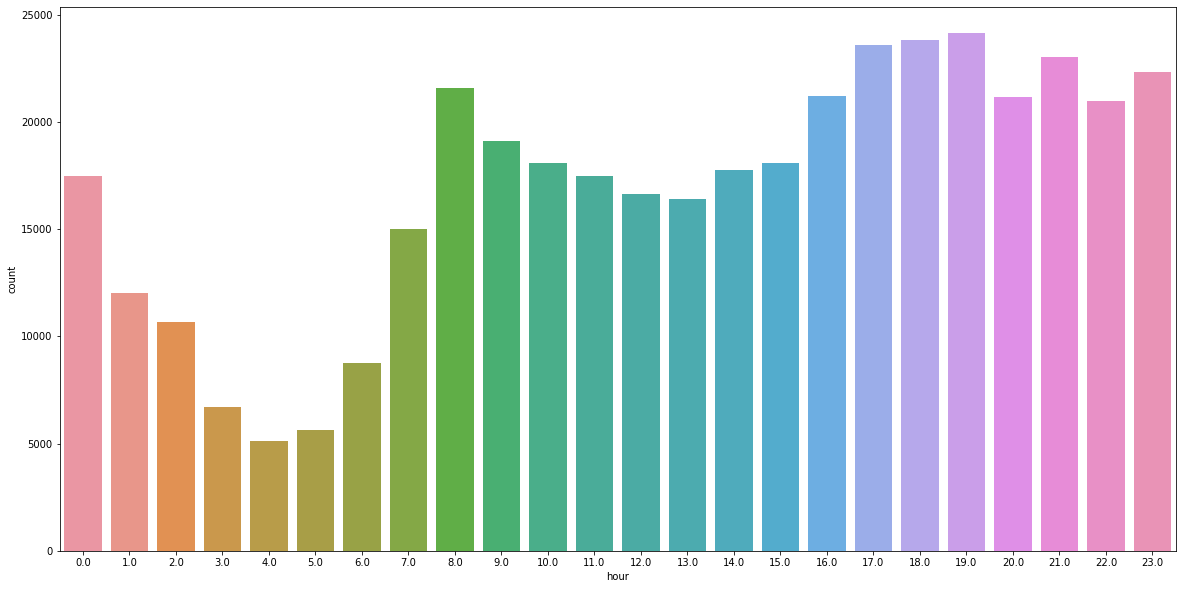

In [178]:
plt.figure(figsize=(20,10))
sns.countplot(uber_15['hour'])

## Depicts the rush as per hours in new York city

In [183]:
summary=uber_15.groupby(['weekday','hour'])['Pickup_date'].count().reset_index()
summary.columns=['weekday','hour','counts']

In [184]:
summary

,weekday,hour,counts
0,Friday,0.0,1078
1,Friday,1.0,201
2,Friday,2.0,120
3,Friday,3.0,78
4,Friday,4.0,108
...,...,...,...
163,Wednesday,19.0,3149
164,Wednesday,20.0,1736
165,Wednesday,21.0,850
166,Wednesday,22.0,631


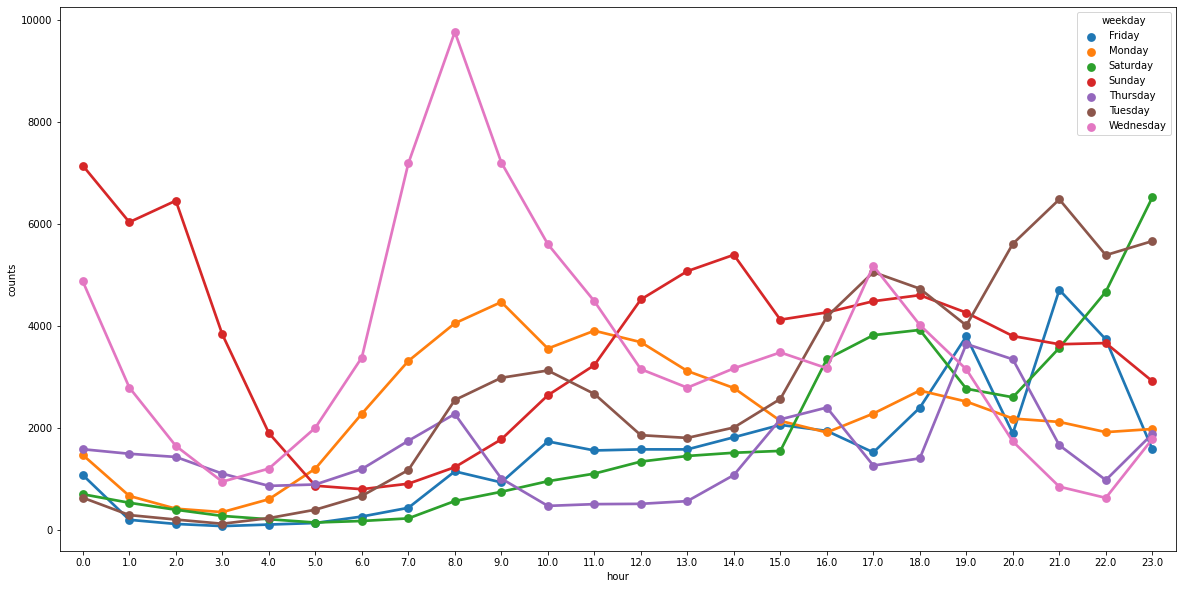

In [204]:
plt.figure(figsize=(20,10))
sns.pointplot(x='hour',y='counts',hue='weekday',data=summary)

In [203]:

uber_foil=pd.read_csv('/content/gdrive/MyDrive/Datasets/Uber-Jan-Feb-FOIL.csv')
uber_foil

,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421
3,B02682,1/1/2015,945,7679
4,B02617,1/1/2015,1228,9537
...,...,...,...,...
349,B02764,2/28/2015,3952,39812
350,B02617,2/28/2015,1372,14022
351,B02682,2/28/2015,1386,14472
352,B02512,2/28/2015,230,1803


<Figure size 1440x720 with 0 Axes>

In [189]:
uber_foil['dispatching_base_number'].unique()

array(['B02512', 'B02765', 'B02764', 'B02682', 'B02617', 'B02598'],
      dtype=object)

Text(0.5, 1.0, 'Dispacthing_base_number vs active vehicles')

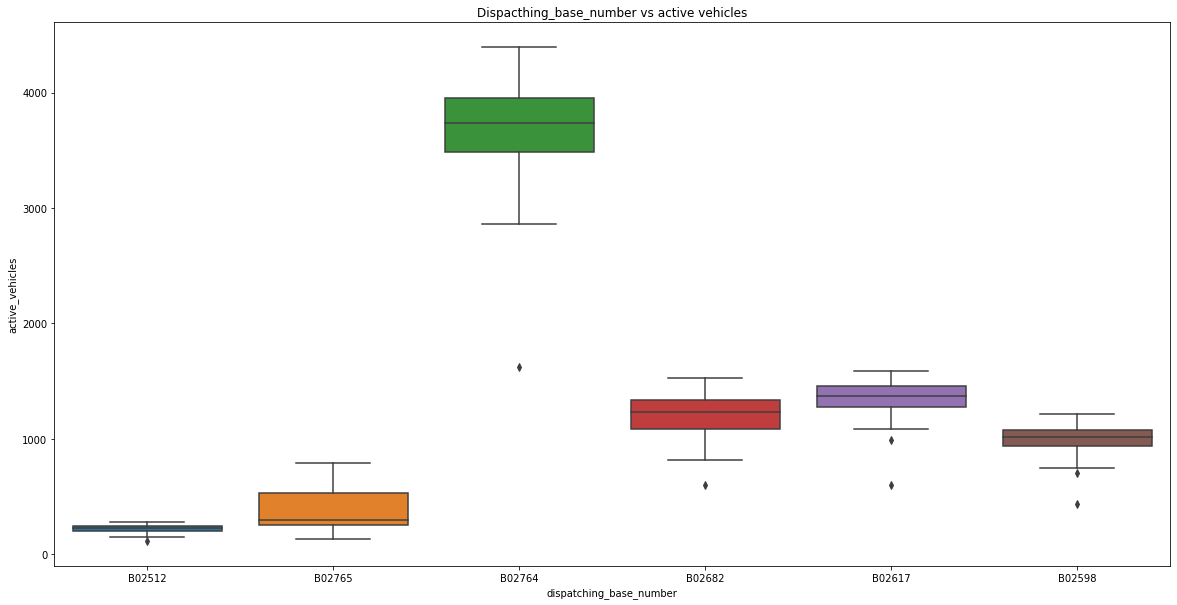

In [202]:
plt.figure(figsize=(20,10))
sns.boxplot(x='dispatching_base_number',y='active_vehicles',data=uber_foil)
plt.title('Dispacthing_base_number vs active vehicles')

In [192]:
uber_foil['trips/vehicle']=uber_foil['trips']/uber_foil['active_vehicles']

In [193]:
uber_foil

,dispatching_base_number,date,active_vehicles,trips,trips/vehicle
0,B02512,1/1/2015,190,1132,5.957895
1,B02765,1/1/2015,225,1765,7.844444
2,B02764,1/1/2015,3427,29421,8.585060
3,B02682,1/1/2015,945,7679,8.125926
4,B02617,1/1/2015,1228,9537,7.766287
...,...,...,...,...,...
349,B02764,2/28/2015,3952,39812,10.073887
350,B02617,2/28/2015,1372,14022,10.220117
351,B02682,2/28/2015,1386,14472,10.441558
352,B02512,2/28/2015,230,1803,7.839130


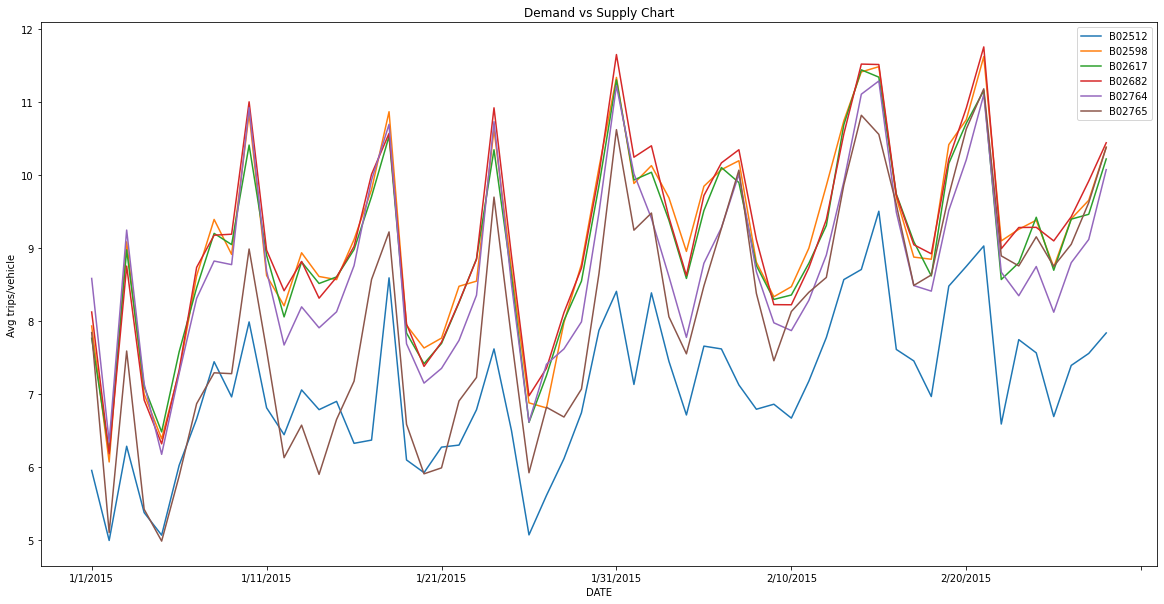

In [198]:
plt.figure(figsize=(20,10))
uber_foil.set_index('date').groupby(['dispatching_base_number'])['trips/vehicle'].plot()
plt.ylabel('Avg trips/vehicle')
plt.xlabel('DATE')
plt.title('Demand vs Supply Chart')
plt.legend()


In [ ]:
plt.show()